In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt 
import numpy as np
import cv2 as cv
import random

In [2]:
img_size = 16

composed = transforms.Compose([transforms.Resize((img_size, img_size)), transforms.ToTensor()])

In [3]:
train_dataset = dsets.FashionMNIST(root = './data', train = True, download = True, transform = composed)

In [4]:
validation_dataset = dsets.FashionMNIST(root = './data', train = False, download = True, transform = composed)

In [5]:
len(train_dataset)

60000

In [6]:
len(validation_dataset)

10000

In [7]:
train_dataset[3][1]  #label for the fourth element

3

In [8]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(img_size, img_size), cmap = 'gray')
    plt.title('y = '+ classes[data_sample[1]])

In [9]:
classes = ['T-shirt/top'
           ,'Trouser'
           ,'Pullover'
           ,'Dress'
           ,'Coat'
           ,'Sandal'
           ,'Shirt'
           ,'Sneaker'
           ,'Bag'
           ,'Ankle boot']

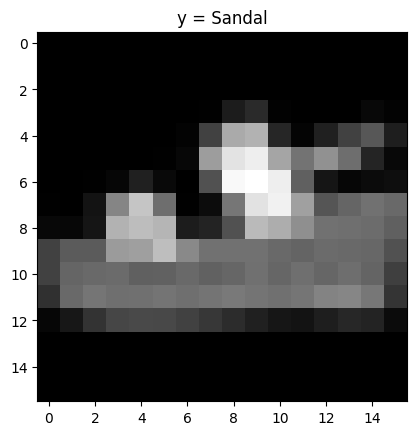

In [10]:
rand = random.randrange(0, 100)
show_data(train_dataset[rand])

In [11]:
class CNN(nn.Module):
    def __init__(self, out_1 = 16, out_2 = 32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = out_1, kernel_size = 5, padding = 2)
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        
        self.cnn2 = nn.Conv2d(in_channels = out_1, out_channels = out_2, kernel_size = 5, stride = 1, padding = 2)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        
        self.linear1 = nn.Linear(out_2*4*4, 10)
        
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.linear1(x)
        
        return x

        

In [12]:
model = CNN(out_1 = 16, out_2 = 32)

In [65]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset  = validation_dataset, batch_size = 5000)

In [66]:
n_epochs = 5
cost_list = []
accuracy_list = []
N_test = len(validation_dataset)
COST = 0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            
            loss = criterion(z, y)
            loss.backward()
            
            optimizer.step()
            
            COST += loss.data
        
        cost_list.append(COST)
        
        correct = 0
        
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
            
        accuracy = correct/N_test
        accuracy_list.append(accuracy)
        
        print(f"{epoch+1}/{n_epochs}  loss: {loss.data}   accuracy: {accuracy*100}%")

In [67]:
train_model(n_epochs)

1/5  loss: 0.2528516352176666   accuracy: 86.52%
2/5  loss: 0.23409897089004517   accuracy: 86.95%
3/5  loss: 0.2180192768573761   accuracy: 87.22999999999999%
4/5  loss: 0.20120586454868317   accuracy: 87.6%
5/5  loss: 0.19626231491565704   accuracy: 87.83%


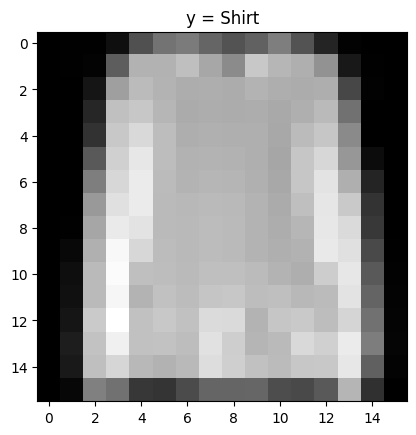

In [69]:
show_data(train_dataset[18])

In [84]:
def check(data_sample):
    show_data(data_sample)
    resize = data_sample[0].view(1, 1, img_size, img_size)
    output = model(resize)
    
    _, label = torch.max(output.data, 1)
    label = label.item()
    classes[label]

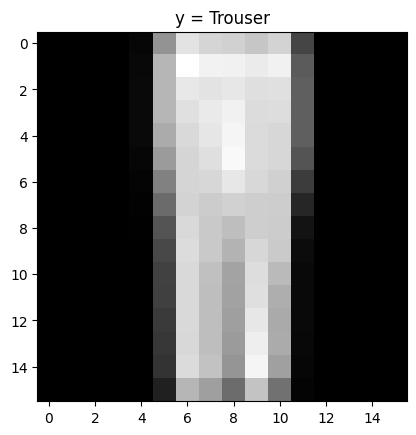

In [90]:
rand = random.randrange(0, 100)
check(validation_dataset[rand])